In [1]:
#import libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
#read the file
data=pd.read_csv('../data/Dataset_ecommerce.csv')

In [3]:
#call 5 data to view the file
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [4]:
#stats of the data
data.describe()

,CustomerID,Quantity,UnitPrice
count,406829.000000,541909.000000,541909.000000
mean,15287.690570,50.534748,50.476354
std,1713.600303,28.849367,28.564775
min,12346.000000,1.000000,1.000000
25%,13953.000000,26.000000,25.750000
50%,15152.000000,51.000000,50.430000
75%,16791.000000,76.000000,75.180000
max,18287.000000,100.000000,100.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    541909 non-null  object 
 4   Description  541909 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
#check for missing data
data.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [7]:
#drop row with missing data
data.dropna(inplace=True)

In [8]:
#check again for mising data
data.isnull().sum()

InvoiceNo      0
InvoiceDate    0
CustomerID     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

In [9]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])

In [10]:
from datetime import datetime as dt

def get_month(x):
    return dt(x.year, x.month, 1)


data['InvoiceDate']= data['InvoiceDate'].apply(get_month)

data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [12]:
#create a new column
data['Total_price']=data['Quantity'] * data['UnitPrice']

In [13]:
#check if total_price has been added to the dataframe
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Total_price
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,664.95
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,1862.95
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,4796.22
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,370.95
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,1941.50


In [111]:
data['InvoiceYear'] = data['InvoiceDate'].dt.year
data['InvoiceMonth'] = data['InvoiceDate'].dt.to_period('M')
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Total_price,cohort date,cohort_index,InvoiceYear,InvoiceMonth
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,664.95,2010-12-01,1,2010,2010-12
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,1862.95,2010-12-01,1,2010,2010-12
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,4796.22,2010-12-01,1,2010,2010-12
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,370.95,2010-12-01,1,2010,2010-12
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,1941.50,2010-12-01,1,2010,2010-12


# ANALYSIS SHOWING DIFFERNT COUNTRY WITH TOTAL AMOUNT OF GOODS BOUGHT

In [14]:
price = data.groupby(['Country'])['Total_price'].sum().reset_index()
price= price.sort_values(['Total_price'], ascending=False)

In [15]:
#top 10 countries with highest amount bought
top10=price.head(10)
top10

,Country,Total_price
9,Libya,37690362.35
19,Somalia,37663830.57
23,Togo,37592496.96
11,Mali,37508467.02
7,Ghana,37414593.40
15,Nigeria,37364243.60
6,Ethiopia,37228695.13
13,Mozambique,37145464.36
18,Sierra Leone,37140824.43
0,Algeria,37140683.52


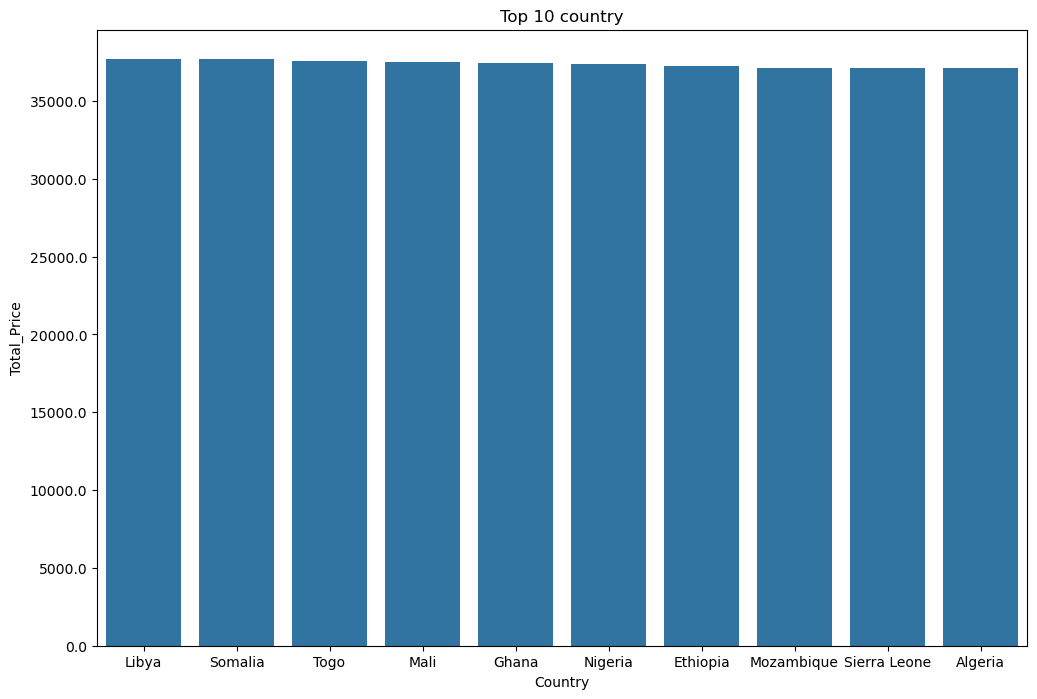

In [112]:
plt.figure(figsize=(12,8))
y_format = FuncFormatter(lambda x, _: f'{x / 1000:.1f}')
ax = sns.barplot(x='Country', y='Total_price', data= top10)
ax.yaxis.set_major_formatter(y_format)
plt.title('Top 10 country')
plt.xlabel('Country')
plt.ylabel('Total_Price')
plt.show()

In [17]:
#Last 10 countries with lowest amount bought
last10=price.tail(10)
last10

,Country,Total_price
1,Benin,36921841.33
16,Rwanda,36864615.30
24,Tunisia,36837574.80
22,Tanzania,36820360.73
14,Niger,36808276.74
2,Burkina Faso,36671763.77
5,Egypt,36619734.48
25,Uganda,36598727.25
10,Madagascar,36524344.59
26,Zambia,36253058.16


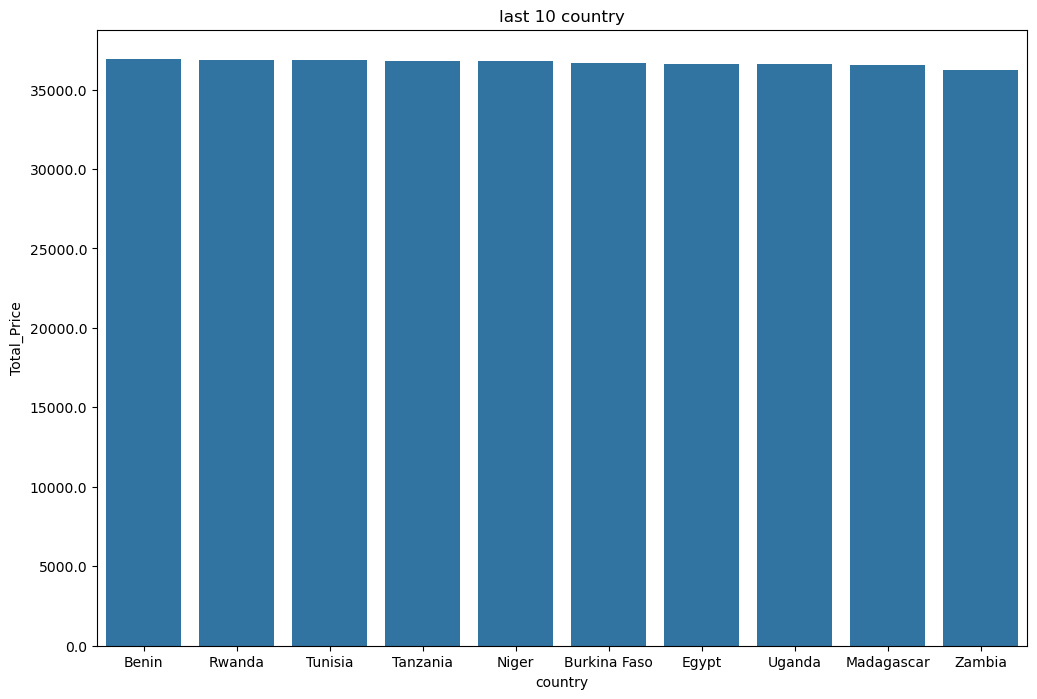

In [113]:
plt.figure(figsize=(12,8))
y_format = FuncFormatter(lambda x, _: f'{x / 1000:.1f}')
ax = sns.barplot(x='Country', y='Total_price', data= last10)
ax.yaxis.set_major_formatter(y_format)
plt.title('last 10 country')
plt.xlabel('country')
plt.ylabel('Total_Price')
plt.show()

# COUNTRY WITH RESPECT TO NUMBER OF CUSTOMER FROM THEM

In [19]:
customer = data.groupby(['Country'])['CustomerID'].nunique().reset_index()
customer= customer.sort_values(['CustomerID'], ascending=False)

In [20]:
#top 10 countries with highest NUMBER of customer
customer = customer.rename(columns={'CustomerID': 'No of Customers'})
customer.head(10)


,Country,No of Customers
13,Mozambique,3072
1,Benin,3054
23,Togo,3053
15,Nigeria,3051
2,Burkina Faso,3049
18,Sierra Leone,3046
11,Mali,3044
0,Algeria,3043
17,Senegal,3040
14,Niger,3039


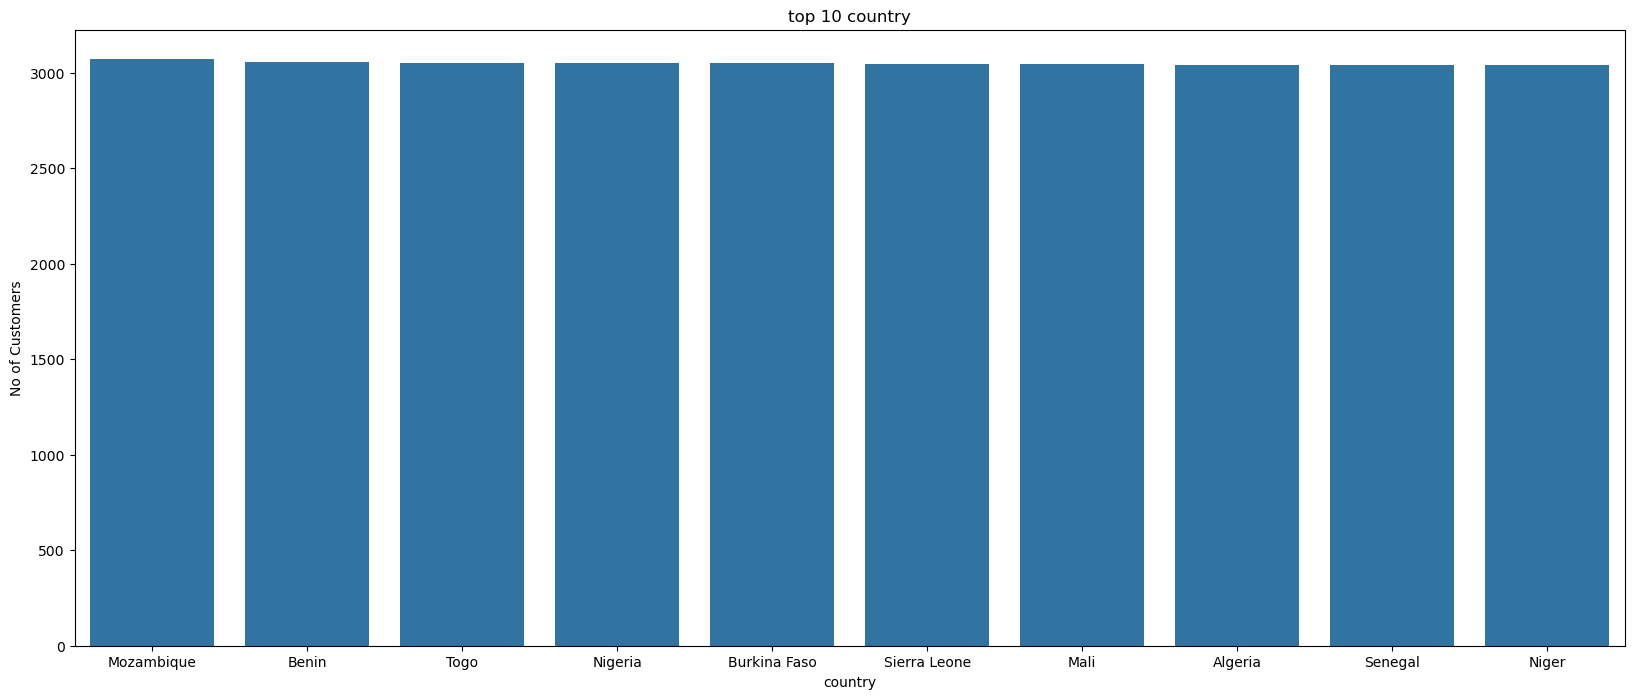

In [21]:
#top 10 countries with highest NUMBER of customer
Ctop10=customer.head(10)
plt.figure(figsize=(20,8))
sns.barplot( x = 'Country', y = 'No of Customers', data=Ctop10)
plt.title('top 10 country')
plt.xlabel('country')
plt.ylabel('No of Customers')
plt.show()

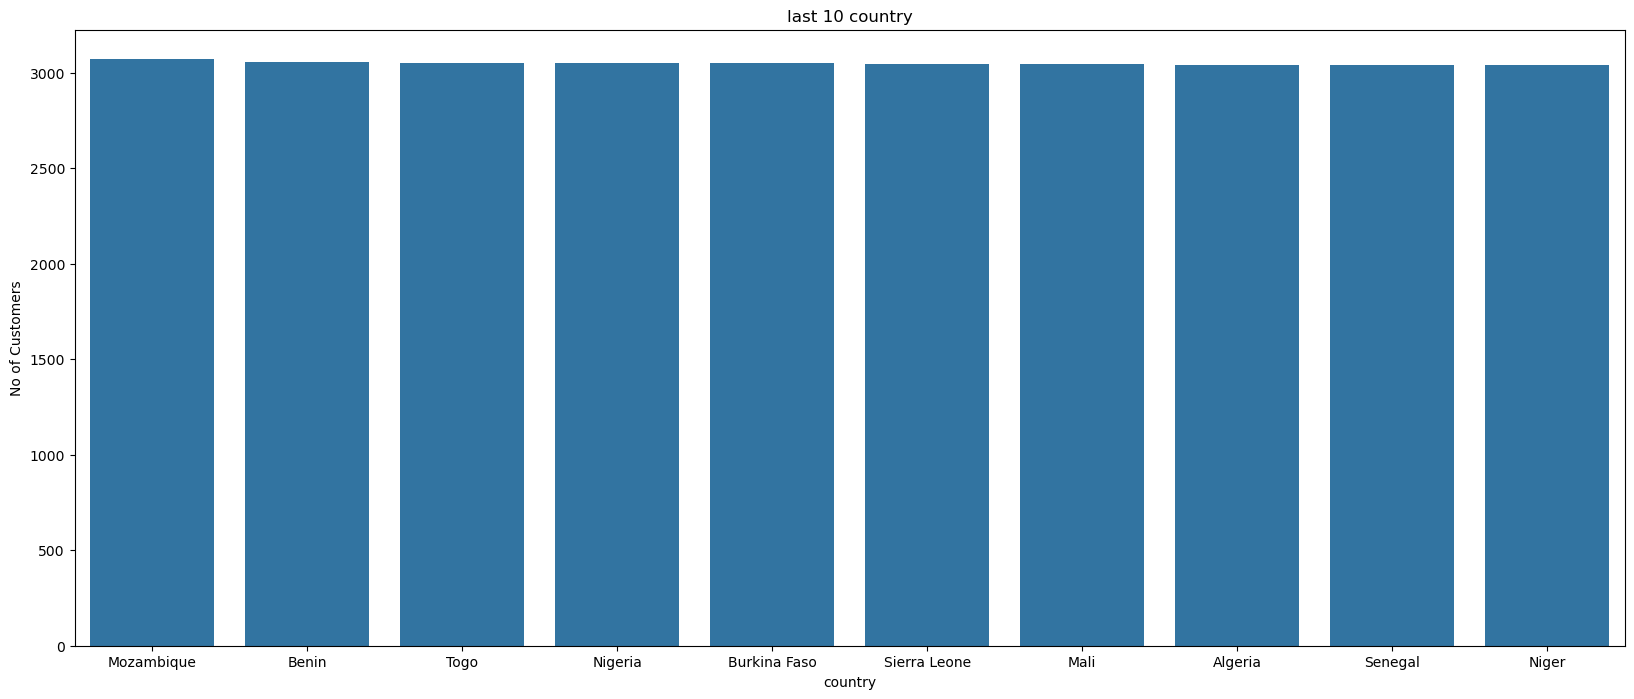

In [22]:
#last countries with lowest NUMBER of customer
Clast10=customer.tail(10)
plt.figure(figsize=(20,8))
sns.barplot( x = 'Country', y = 'No of Customers', data=Ctop10)
plt.title('last 10 country')
plt.xlabel('country')
plt.ylabel('No of Customers')
plt.show()

# DIFFERNT GOODS BOUGHT IN RESPECT TO COUNTRY

In [23]:
country_des = data.pivot_table(index='Country',
                                 columns='Description',
                                 aggfunc='size',
                                 fill_value=0)

country_des.head(5)

Description,Books,Cloths,Cosmetics,Electronics,Furniture,Jewelry,Kitchenware,Shoes,Sports Equipment,Toys
Country,,,,,,,,,,
Algeria,1422,1468,1452,1432,1401,1464,1410,1512,1482,1449
Benin,1456,1476,1423,1459,1423,1502,1516,1409,1503,1443
Burkina Faso,1428,1412,1448,1470,1465,1408,1512,1451,1408,1411
Cameroon,1452,1442,1529,1378,1483,1488,1432,1464,1459,1492
Cote d'Ivoire,1468,1509,1483,1456,1482,1459,1401,1419,1492,1476


In [24]:
most_desc= data['Description'].value_counts()

In [25]:
most_desc.head()

Description
Jewelry             41017
Sports Equipment    40983
Toys                40829
Furniture           40770
Shoes               40769
Name: count, dtype: int64

# SALES TREND

In [26]:
# Group the data by month and calculate the total monthly sales
monthly_sales = data.groupby(data['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()

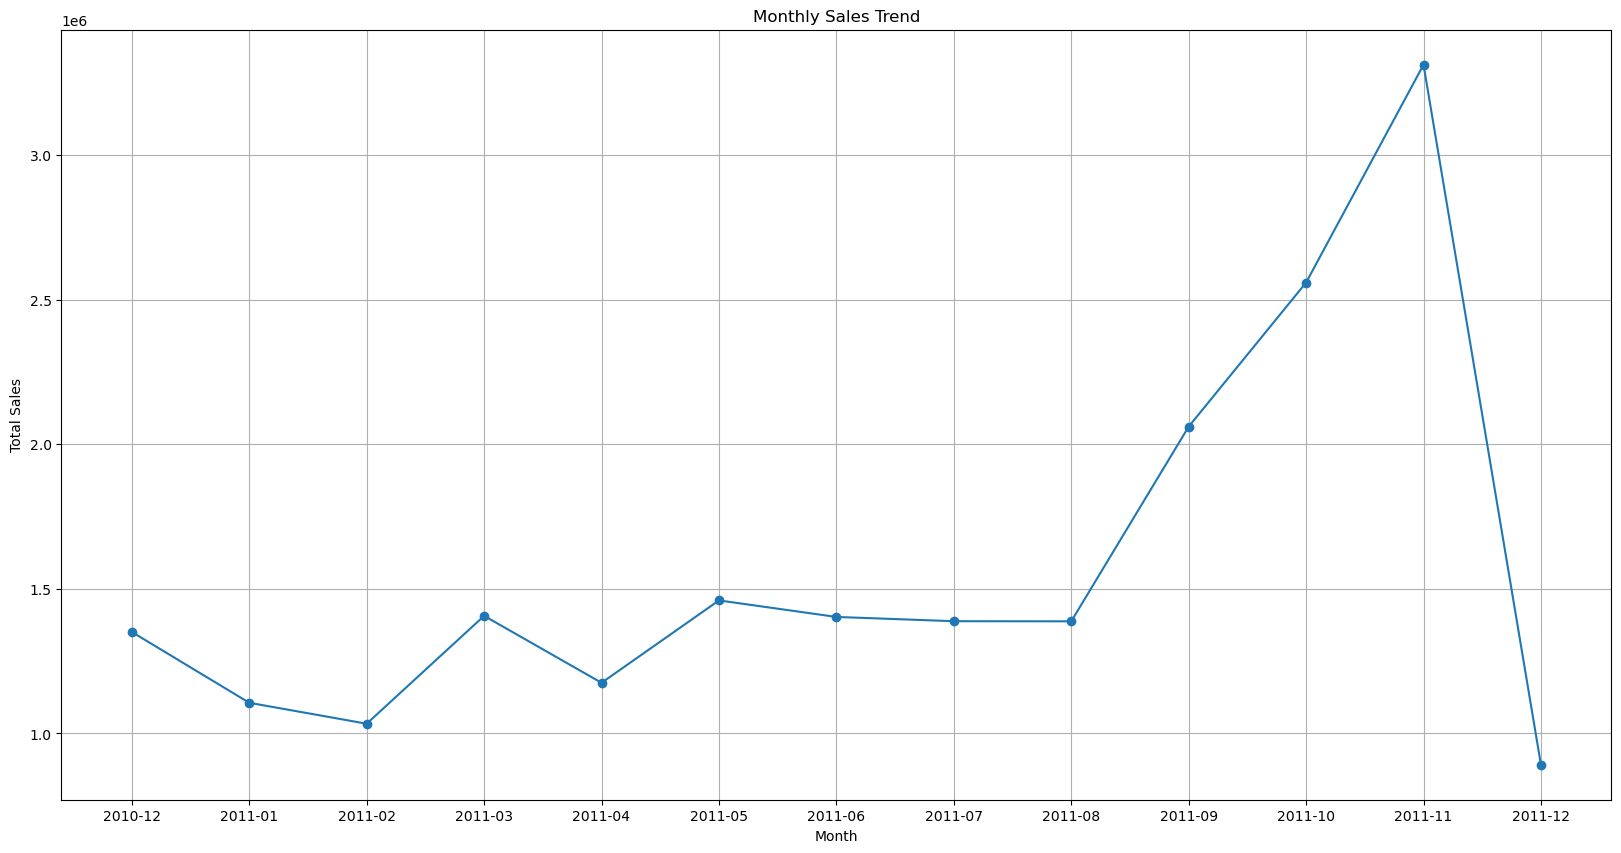

In [27]:
# Create a line chart
plt.figure(figsize=(20, 10))
plt.plot(monthly_sales.index.strftime('%Y-%m'), monthly_sales.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.grid(True)

# Display the plot
plt.show()


# CUSTOMER FREQUENCY [ How often a customer makes purchases over a specific period ]

In [28]:
#calculate the customers frequency
most_freqent_customer = data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Renaming the 'count' column to 'frequency'
most_freqent_customer = most_freqent_customer.rename(columns={'InvoiceNo': 'Frequency'})

most_freqent_customer = most_freqent_customer.sort_values(['Frequency'], ascending=False)
most_freqent_customer

,CustomerID,Frequency
1895,14911.0,248
330,12748.0,224
4042,17841.0,169
1674,14606.0,128
568,13089.0,118
...,...,...
1141,13877.0,1
2997,16400.0,1
1142,13878.0,1
1149,13886.0,1


In [29]:
# top 10 
frequency_15 = most_freqent_customer.head(15)
frequency_15

,CustomerID,Frequency
1895,14911.0,248
330,12748.0,224
4042,17841.0,169
1674,14606.0,128
568,13089.0,118
2192,15311.0,118
487,12971.0,89
1615,14527.0,86
803,13408.0,81
1703,14646.0,77


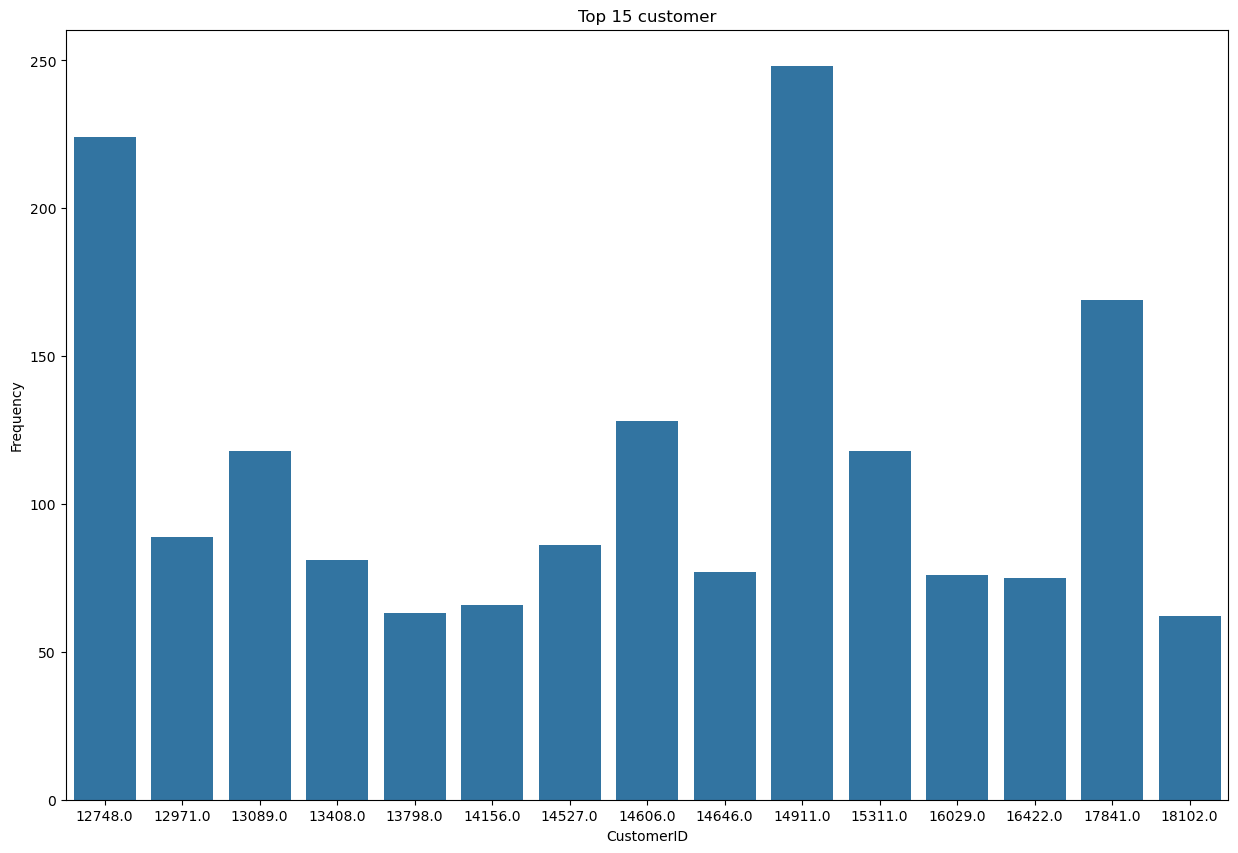

In [30]:
# top 10 loyal
plt.figure(figsize=(15,10))
sns.barplot( x ='CustomerID', y= 'Frequency', data=frequency_15 )
plt.title('Top 15 customer')
plt.xlabel('CustomerID')
plt.ylabel('Frequency')
plt.show()

In [31]:
# last 10
last_10 = most_freqent_customer.tail(10)
last_10

,CustomerID,Frequency
3007,16412.0,1
1138,13874.0,1
1140,13876.0,1
3003,16406.0,1
3001,16404.0,1
1141,13877.0,1
2997,16400.0,1
1142,13878.0,1
1149,13886.0,1
990,13670.0,1


# CUSTOMER MONETARY [ The total amount of money a customer has spent ]

In [32]:
spending_customer = data.groupby(['CustomerID'])['Total_price'].sum().reset_index()
spending_customer = spending_customer.sort_values(['Total_price'], ascending=False)
spending_customer= spending_customer.rename(columns={'Total_price': 'Total money spent'})
spending_customer

,CustomerID,Total money spent
4042,17841.0,20383830.65
1895,14911.0,15362741.47
1300,14096.0,12965429.74
330,12748.0,11912482.34
1674,14606.0,7144512.92
...,...,...
777,13366.0,99.12
3677,17347.0,66.30
3351,16881.0,60.32
2525,15753.0,30.82


In [33]:
top10spending_customer=spending_customer.head(10)
top10spending_customer

,CustomerID,Total money spent
4042,17841.0,20383830.65
1895,14911.0,15362741.47
1300,14096.0,12965429.74
330,12748.0,11912482.34
1674,14606.0,7144512.92
2192,15311.0,6301150.63
1703,14646.0,5418075.66
568,13089.0,4739395.74
698,13263.0,4233075.52
1447,14298.0,4123714.52


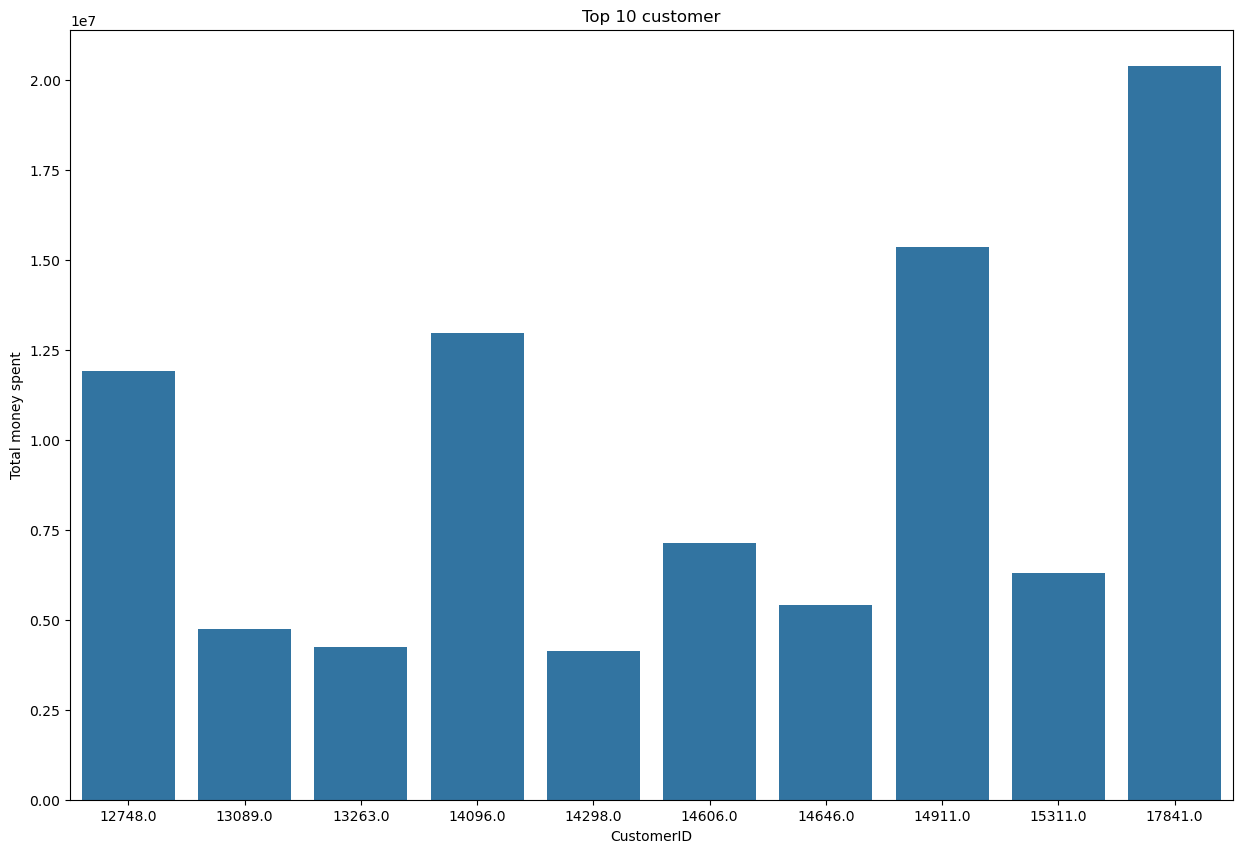

In [34]:
plt.figure(figsize=(15,10))
sns.barplot( x ='CustomerID', y= 'Total money spent', data=top10spending_customer )
plt.title('Top 10 customer')
plt.xlabel('CustomerID')
plt.ylabel('Total money spent')
plt.show()

In [35]:
last10spending_customer=spending_customer.tail(10)
last10spending_customer

,CustomerID,Total money spent
727,13302.0,274.93
3242,16737.0,214.89
3991,17763.0,200.42
1010,13703.0,112.95
1536,14424.0,99.18
777,13366.0,99.12
3677,17347.0,66.30
3351,16881.0,60.32
2525,15753.0,30.82
2350,15524.0,17.36


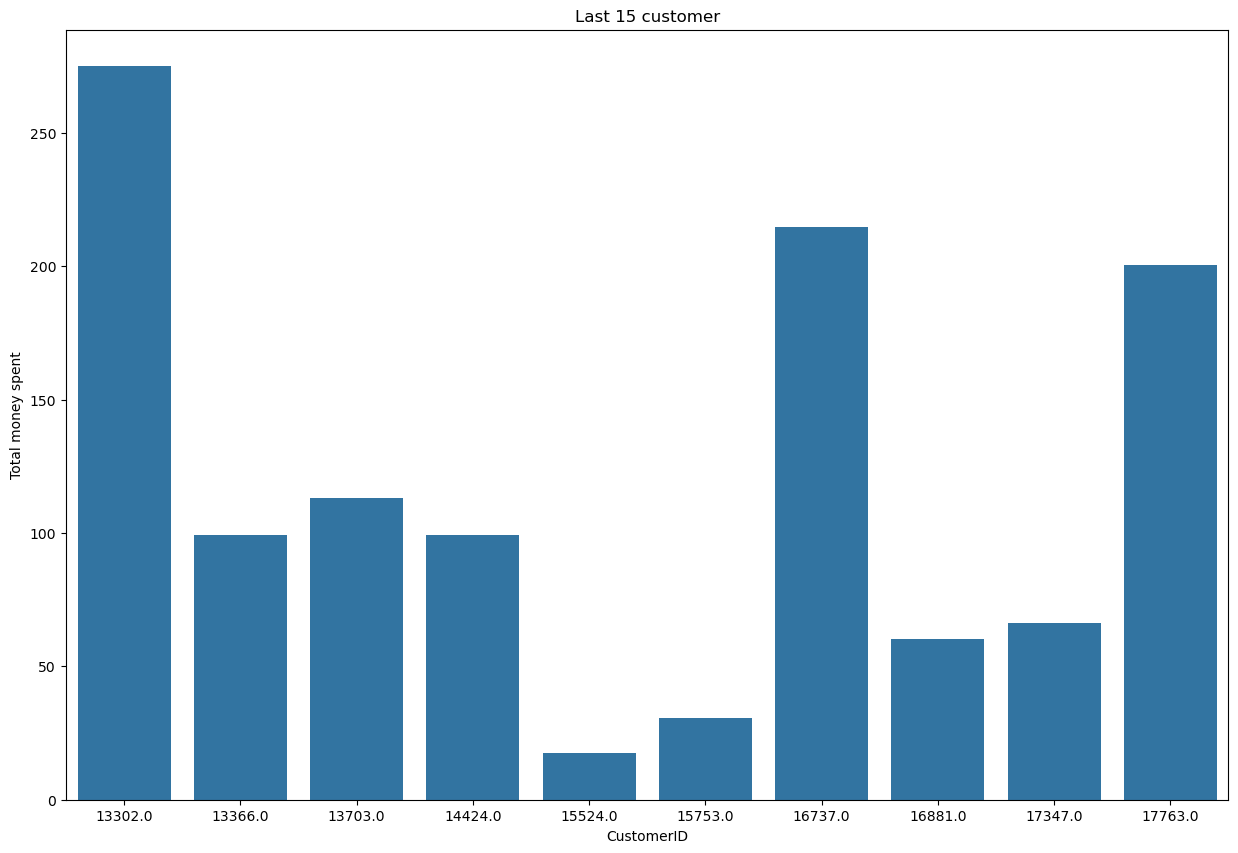

In [36]:
plt.figure(figsize=(15,10))
sns.barplot( x ='CustomerID', y= 'Total money spent', data=last10spending_customer )
plt.title('Last 15 customer')
plt.xlabel('CustomerID')
plt.ylabel('Total money spent')
plt.show()

# CUSTOMER RECENCY / CUSTOMER TENURE [ Amount of time that has passed since a customer's last purchase ]

In [37]:
recent_date = data['InvoiceDate'].max()
recent_date

Timestamp('2011-12-01 00:00:00')

In [38]:
recency_time = data.groupby(['CustomerID'])['InvoiceDate'].max().reset_index()
recency_time

,CustomerID,InvoiceDate
0,12346.0,2011-01-01
1,12347.0,2011-12-01
2,12348.0,2011-09-01
3,12349.0,2011-11-01
4,12350.0,2011-02-01
...,...,...
4367,18280.0,2011-03-01
4368,18281.0,2011-06-01
4369,18282.0,2011-12-01
4370,18283.0,2011-12-01


In [39]:
recency_time['Recency'] = (recent_date - recency_time['InvoiceDate']).dt.days
recency_time = recency_time.sort_values(['Recency'], ascending=False)
recency_time

,CustomerID,InvoiceDate,Recency
3227,16718.0,2010-12-01,365
704,13270.0,2010-12-01,365
4246,18119.0,2010-12-01,365
1046,13747.0,2010-12-01,365
3254,16752.0,2010-12-01,365
...,...,...,...
1712,14658.0,2011-12-01,0
1713,14659.0,2011-12-01,0
498,12989.0,2011-12-01,0
3835,17554.0,2011-12-01,0


In [40]:
updatedrecency_time = recency_time[['CustomerID','Recency']].reset_index(drop=True)
updatedrecency_time

,CustomerID,Recency
0,16718.0,365
1,13270.0,365
2,18119.0,365
3,13747.0,365
4,16752.0,365
...,...,...
4367,14658.0,0
4368,14659.0,0
4369,12989.0,0
4370,17554.0,0


In [41]:
Rtop10 = updatedrecency_time.head(10)
Rtop10

,CustomerID,Recency
0,16718.0,365
1,13270.0,365
2,18119.0,365
3,13747.0,365
4,16752.0,365
5,16754.0,365
6,18113.0,365
7,16781.0,365
8,16795.0,365
9,16812.0,365


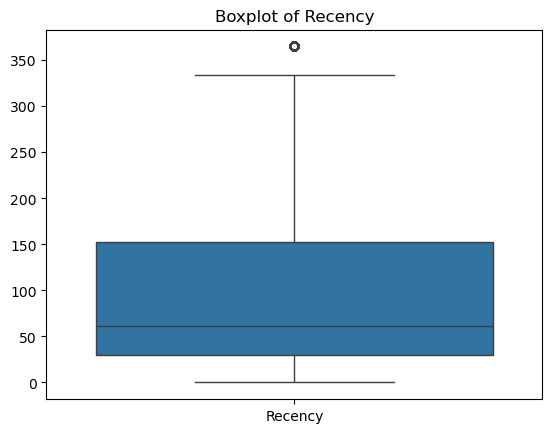

In [42]:
sns.boxplot(data=updatedrecency_time[['Recency']])
plt.title('Boxplot of Recency')
plt.show()

In [43]:
updatedrecency_time['Recency'].quantile(0.25)

30.0

In [44]:
updatedrecency_time['Recency'].quantile(0.50)

61.0

In [45]:
updatedrecency_time['Recency'].quantile(0.75)

153.0

In [46]:
updatedrecency_time['Recency'].max()
print( "Highest Recency:", updatedrecency_time['Recency'].max() ) 

Highest Recency: 365


In [47]:
updatedrecency_time['Recency'].min()
print( "Lowest Recency:", updatedrecency_time['Recency'].min() )

Lowest Recency: 0


# Customer recency,frequency and monetary

In [77]:
Customer_RFM = pd.DataFrame({ 'CustomerID':updatedrecency_time['CustomerID'],
    'Recency': updatedrecency_time['Recency'],
    'Total Money Spent': spending_customer['Total money spent'],
    'Frequency': most_freqent_customer['Frequency']
})

Customer_RFM.head(10)


,CustomerID,Recency,Total Money Spent,Frequency
0,16718.0,365,5342.40,2
1,13270.0,365,431501.00,7
2,18119.0,365,82378.47,4
3,13747.0,365,176075.12,1
4,16752.0,365,48173.37,1
5,16754.0,365,241567.46,11
6,18113.0,365,4357.89,1
7,16781.0,365,161522.49,1
8,16795.0,365,37648.28,1
9,16812.0,365,161617.98,3


# COHORT ANALYSIS

# Cohort date analysis

In [48]:
def get_cohort_date(data):
    data["cohort date"] = data.groupby("CustomerID")["InvoiceDate"].transform("min")

    return data["cohort date"]

In [49]:
data["cohort date"] = get_cohort_date(data)
data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Total_price,cohort date
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,664.95,2010-12-01
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,1862.95,2010-12-01
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,4796.22,2010-12-01
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,370.95,2010-12-01
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,1941.50,2010-12-01
...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,913.25,2011-08-01
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,8521.10,2011-08-01
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,560.98,2011-08-01
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,3592.35,2011-08-01


# Cohort index analysis

In [50]:
def get_year_and_month(data, col):
    month = data[col].dt.month
    year = data[col].dt.year
    return month, year

In [51]:
first_month, first_year = get_year_and_month(data,"cohort date")

In [52]:
latest_month, latest_year = get_year_and_month(data,"InvoiceDate")

In [53]:
def create_cohort_index(first_month, first_year, latest_month,latest_year):
    year_diff = latest_year - first_year
    month_diff = latest_month - first_month
    index = year_diff*12 + month_diff +1 # +1 is added because of customers who have been active for just 1 month
    return index

In [54]:
data["cohort_index"] = create_cohort_index(first_month, first_year, latest_month, latest_year)

In [55]:
data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Total_price,cohort date,cohort_index
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,664.95,2010-12-01,1
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,1862.95,2010-12-01,1
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,4796.22,2010-12-01,1
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,370.95,2010-12-01,1
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,1941.50,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,913.25,2011-08-01,5
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,8521.10,2011-08-01,5
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,560.98,2011-08-01,5
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,3592.35,2011-08-01,5


# Cohort ( retention rate )

In [56]:
cohort_info = data.groupby(["cohort date","cohort_index"])["CustomerID"].nunique().reset_index()
cohort_info.rename(columns = {"CustomerID": "Number of customers"}, inplace = True)
cohort_info

,cohort date,cohort_index,Number of customers
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


In [57]:
# create a pivot table
cohort_table = cohort_info.pivot(index = "cohort date", columns = ["cohort_index"], values = "Number of customers")

#change index to understandable format
cohort_table.index = cohort_table.index.strftime('%B %Y')
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
January 2011,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
February 2011,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
March 2011,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
April 2011,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
May 2011,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
June 2011,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='cohort date'>

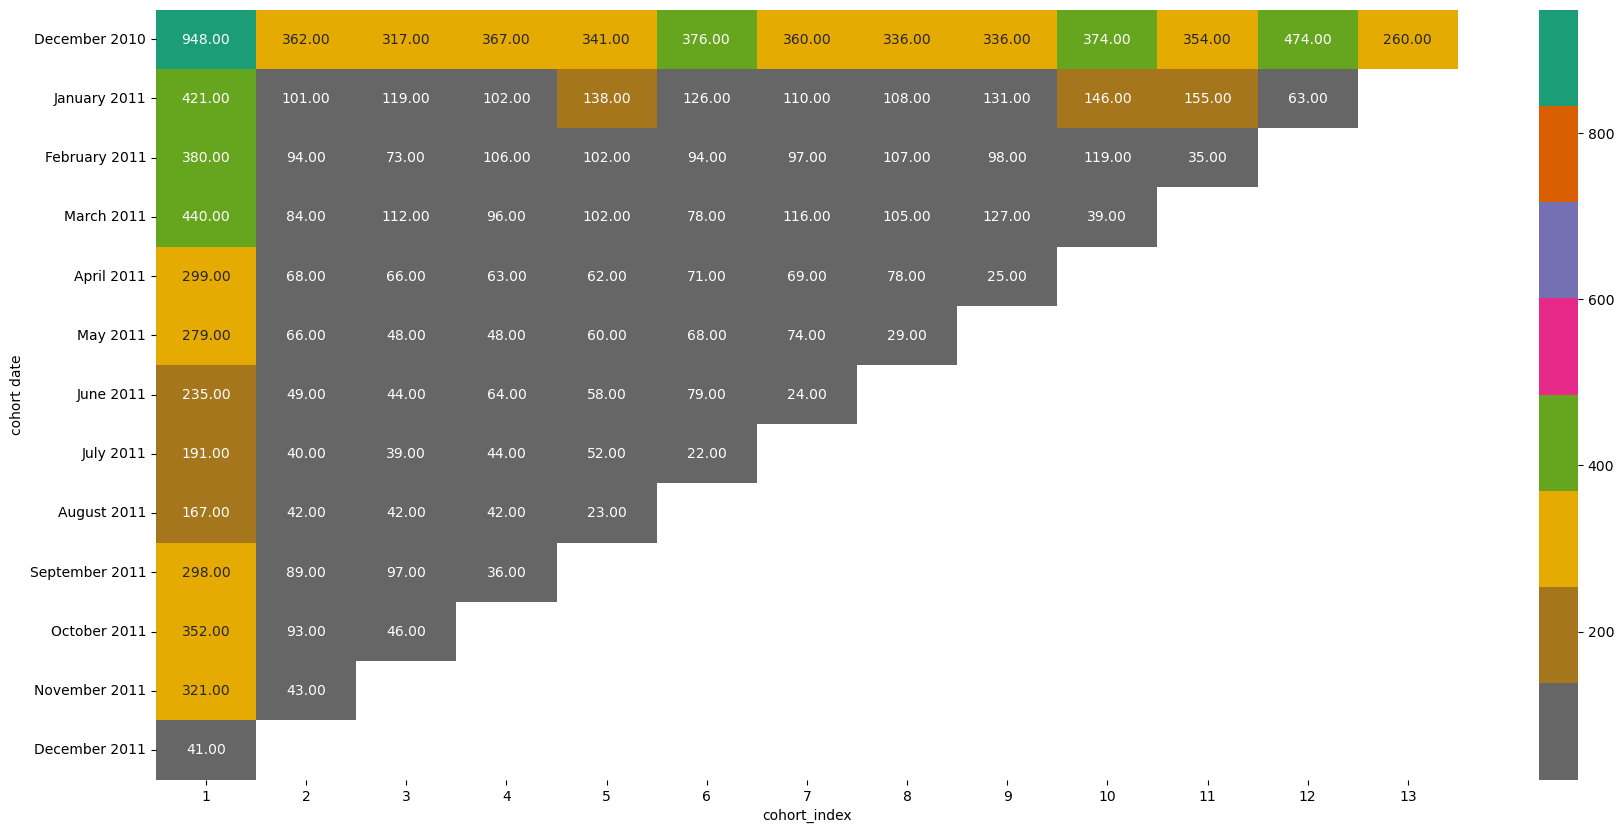

In [58]:
plt.figure(figsize = (21,10))
sns.heatmap(cohort_table, annot = True, cmap = 'Dark2_r',  fmt = '.2f')

The above shows that
for December 2010: 948 registered a purchase which later reduced to 

In [114]:
# showing retention rate in percentage
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0], axis = 0)
new_cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
January 2011,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
February 2011,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
March 2011,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
April 2011,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
May 2011,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
June 2011,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='cohort date'>

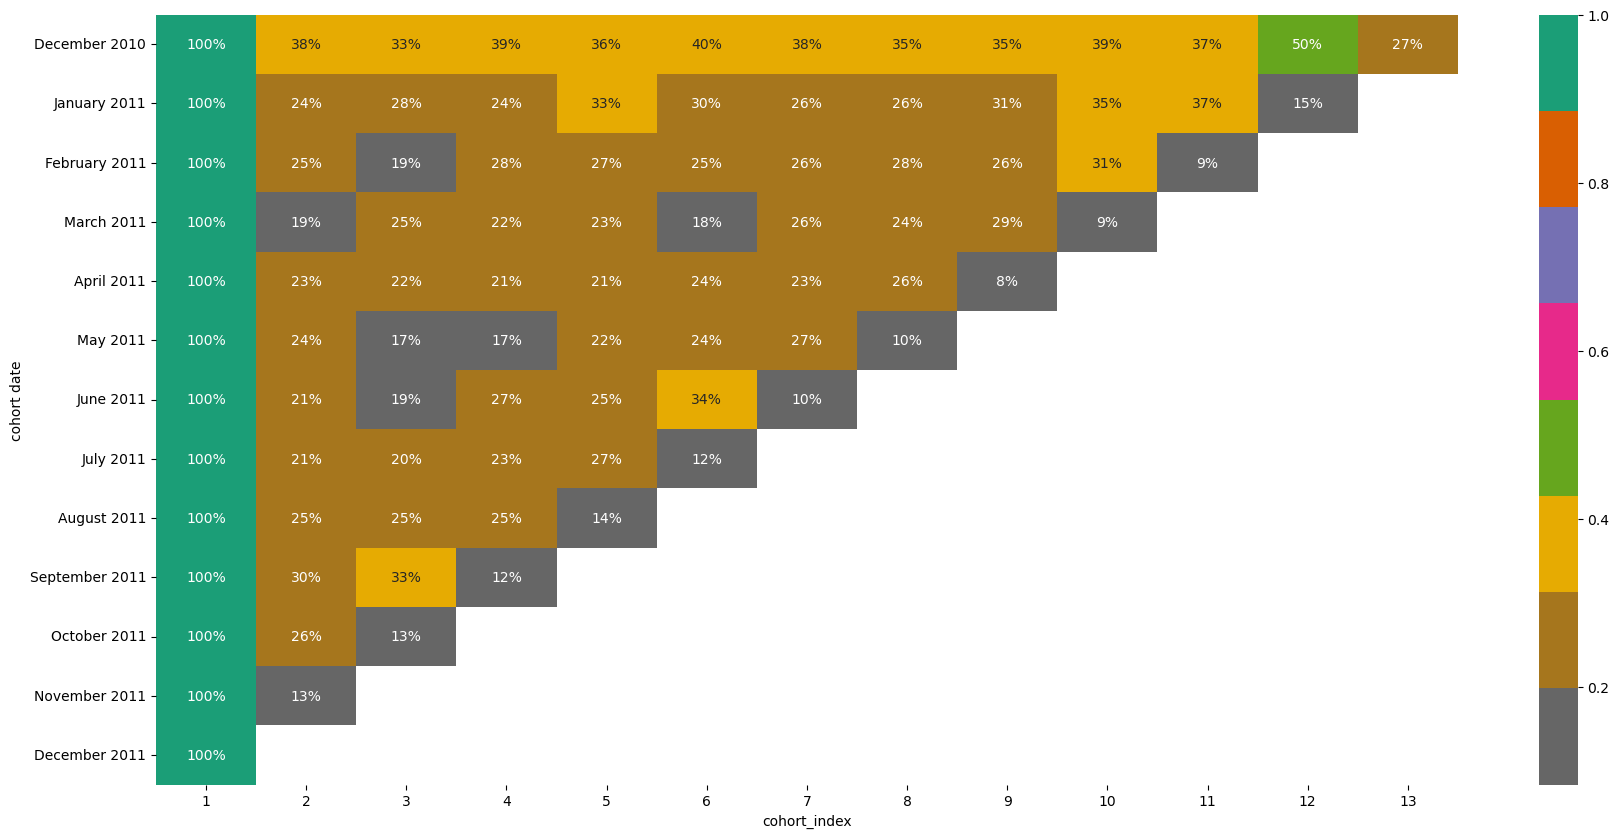

In [115]:
plt.figure(figsize = (21,10))
sns.heatmap(new_cohort_table, annot = True, cmap = 'Dark2_r', fmt = '.0%')

In [116]:
average_quantity = data.groupby(["cohort date", "cohort_index"])["Quantity"].mean().reset_index()
average_quantity["Quantity"] = average_quantity["Quantity"].round(3)

In [117]:
average_quantity.rename(columns = {"Quantity": "average quantity"}, inplace = True)
average_quantity

,cohort date,cohort_index,average quantity
0,2010-12-01,1,50.310
1,2010-12-01,2,50.259
2,2010-12-01,3,50.351
3,2010-12-01,4,50.635
4,2010-12-01,5,50.629
...,...,...,...
86,2011-10-01,2,49.928
87,2011-10-01,3,49.367
88,2011-11-01,1,51.056
89,2011-11-01,2,48.629


In [94]:
quantity_table = average_quantity.pivot(index = "cohort date", columns = ["cohort_index"], values = "average quantity")
quantity_table.index = quantity_table.index.strftime('%B %Y')
quantity_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,50.310,50.259,50.351,50.635,50.629,50.423,50.526,50.468,50.182,50.574,50.546,50.641,50.677
January 2011,50.677,50.616,50.759,50.621,50.909,50.373,50.290,50.437,50.468,49.942,50.590,50.531,NaN
February 2011,51.208,49.737,51.033,50.335,50.219,50.688,49.180,50.741,50.920,49.592,50.085,NaN,NaN
March 2011,50.528,50.213,50.248,50.244,50.114,50.614,50.001,51.082,50.120,50.442,NaN,NaN,NaN
April 2011,50.686,49.854,49.970,50.127,50.637,50.318,50.294,49.920,51.072,NaN,NaN,NaN,NaN
May 2011,50.745,49.379,50.154,49.663,51.187,50.548,49.926,51.350,NaN,NaN,NaN,NaN,NaN
June 2011,50.578,50.955,48.453,50.551,51.366,50.879,50.264,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,50.734,49.491,50.792,50.084,49.771,50.720,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,50.506,49.848,50.435,51.039,50.171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='cohort date'>

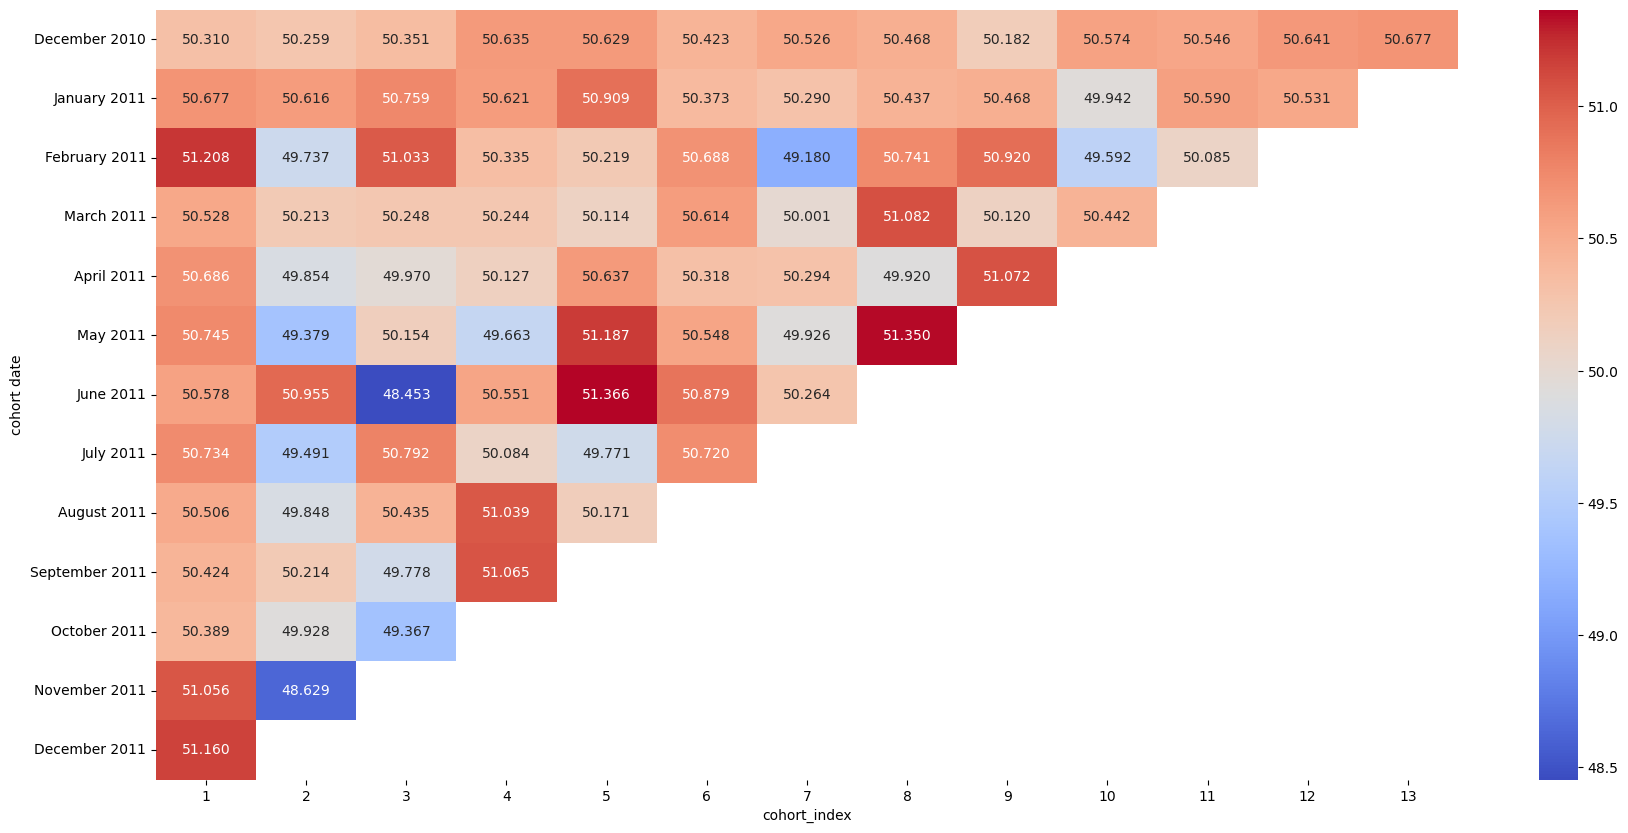

In [95]:
plt.figure(figsize = (21,10))
sns.heatmap(quantity_table, annot = True, cmap = 'coolwarm', fmt = '.3f')

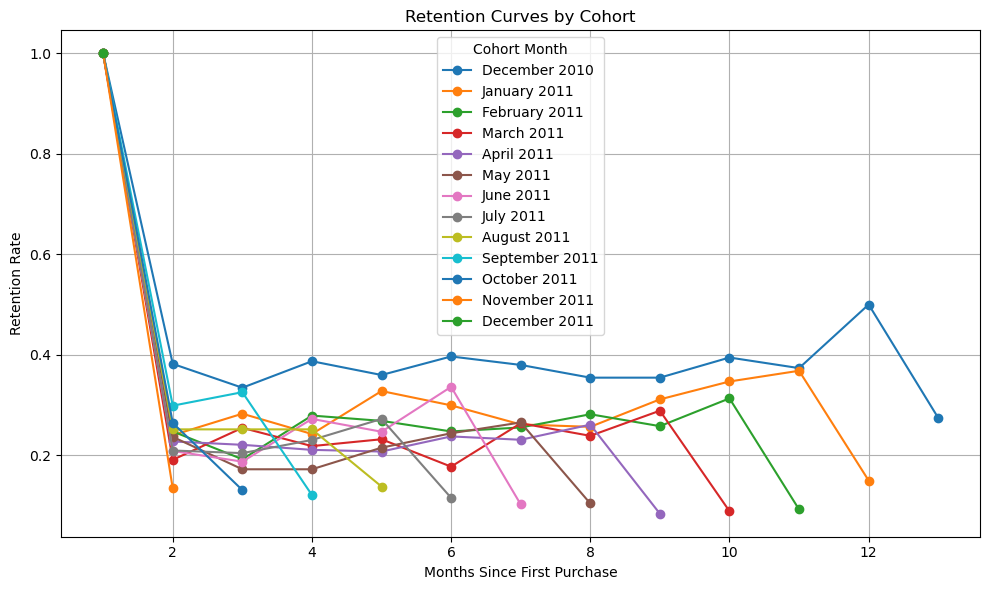

In [118]:
plt.figure(figsize=(10, 6))

for cohort in new_cohort_table.index:
    plt.plot(new_cohort_table.columns, new_cohort_table.loc[cohort], marker='o', label=str(cohort))

plt.title("Retention Curves by Cohort")
plt.xlabel("Months Since First Purchase")
plt.ylabel("Retention Rate")
plt.legend(title="Cohort Month")
plt.grid(True)
plt.tight_layout()
plt.show()

## **Churn Timing Analysis**

In [119]:

active_months = data.groupby(['CustomerID'])['cohort_index'].nunique()

# Basic churn stats
average_lifetime = active_months.mean()
median_lifetime = active_months.median()

print(f"Average customer lifetime: {average_lifetime:.2f} months")
print(f"Median customer lifetime: {median_lifetime:.0f} months")

Average customer lifetime: 3.13 months
Median customer lifetime: 2 months


In [120]:
# A customer is churned if they haven't purchased again for 3 months after their last transaction
churn_threshold = 3
last_purchase = data.groupby('CustomerID')['InvoiceDate'].max()

cutoff_date = data['InvoiceDate'].max() - pd.DateOffset(months=3)
churn_flag = last_purchase < cutoff_date

customer_churn_df = pd.DataFrame({
    'Last time Purchase': last_purchase,
    'Churned': churn_flag
})

print(customer_churn_df.head())


           Last time Purchase  Churned
CustomerID                            
12346.0            2011-01-01     True
12347.0            2011-12-01    False
12348.0            2011-09-01    False
12349.0            2011-11-01    False
12350.0            2011-02-01     True
